# # Badanie rożnych funkcji  aktywacyjnych 

In [1]:
import import_ipynb
import basic_create_model_function as al
import tensorflow.keras as keras
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


importing Jupyter notebook from basic_create_model_function.ipynb


Co to jest funckja aktywacyjna? 
* Jest to równania matematyczne, które określają wyjście pojedynczego neurona,które przyjmuje normalizowane wartości od zakresu od 1 do 0 lub od -1 do 1. 
* Każdy neuron ma wagę, a pomnożenie liczby wejściowej przez wagę daje wynik neuronu, który jest przenoszony do następnej warstwy.


Informacje ogolne o badanym modelu:
* Badanym przez nas siec neuronowa to siec gesta (Dense), ktory każdy neuron jest połaczyn z każdym neuronem z kolejne warstwy wiec każdy neuron jest zawsze aktywowany.
* W deep learning wykorzystuje się funkcje nie liniowe ,ponieważ dla funkcji liniowych nie ma znaczenia ilość warst (zawsze i tak jest jedna warstwa).

W badaniu zajmie sie nastepny funkcja aktywacyjnych, ktore znajdują się w biblotece Keras:
* relu
* sigmoid 
* softplus 
* softsing 
* tanh 
* selu 
* elu
* swish



In [12]:
list_activaton_function =   [ tf.nn.relu,tf.nn.sigmoid,tf.nn.softplus, tf.nn.softsign,tf.nn.tanh, tf.nn.selu, tf.nn.elu, tf.nn.swish ]
name_activation_function =  ['relu','sigmoid','softplus','softsing','tanh','selu','elu','swish']

In [13]:

def avarage_create_model_for_all_activation_function():
    df = pd.DataFrame(columns=['activation', 'val_loss', 'val_acc', 'loss', 'acc', 'trains_time'])

    index = 0
    
    for i  in range(10):
        index_name = 0
        for activation in list_activaton_function :
            
            val_loss, val_acc, loss, acc, trains_time, model = al.create_model_with_history_for_all_epochs(activation= list_activaton_function[index_name],verbose = 0)
            
            ls = [name_activation_function[index_name],val_loss[-1], val_acc[-1], loss[-1], acc[-1], sum(trains_time)]
            
            df.loc[index] = ls

            index += 1 
            index_name += 1 

    df_mean = df.groupby(by='activation').mean().reset_index()
    return df_mean

In [14]:
df_mean = avarage_create_model_for_all_activation_function()
df_mean

Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 
Trenuję: 


,activation,val_loss,val_acc,loss,acc,trains_time
0,elu,0.112960,0.96444,0.106455,0.966818,6.337522
1,relu,0.097200,0.97012,0.073312,0.976762,6.170875
2,selu,0.128450,0.96046,0.125520,0.961248,6.382904
3,sigmoid,0.154221,0.95231,0.164776,0.950677,6.231506
4,softplus,0.130594,0.95919,0.138561,0.957287,6.595049
5,softsing,0.118347,0.96375,0.114616,0.965460,6.305855
6,swish,0.095859,0.97016,0.084753,0.973575,6.588647
7,tanh,0.113041,0.96524,0.110648,0.966272,6.458946


Jak widać z tabelki wyżej funkcje aktywujące mają zbiliżone wyniki, aby ocenić ktorą funkcja aktywująca jest najlepsza sprawdze los oraz acc dla danych testowych. 


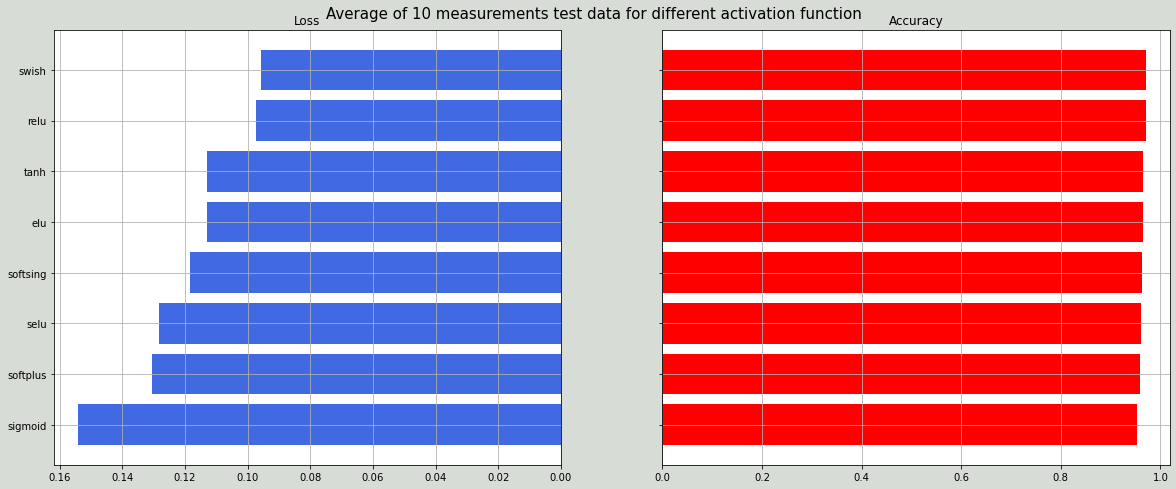

In [30]:
df_mean = df_mean.sort_values(by=['val_acc'],ascending=True)
y = df_mean['activation']
x_male = df_mean['val_loss']
x_female = df_mean['val_acc']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20, 8))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Average of 10 measurements test data for different activation function", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Loss')
axes[1].barh(y, x_female, align='center', color='red')
axes[1].set(title='Accuracy')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_mean['activation'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

Z grafu wyżej wynika, że najlepszą funkcji aktywującą jest switch albo relu bo mają najwiekszą poprawność(accuracy) oraz najmniejszą stratę(loss). 
Równiesz można zauważyć, że wszytkie funkcje aktywującą maja bardzo zbliżone wartośći, dlatego dla naszego modelu nie to wielkiego znaczenia jako funkcje aktywującą wybrać. Jednakże aby ocenić czy switch czy relu jest najlepszą funkcją aktywującą na naszego modelu, to porównamy czas wykonania tych dwóch fukcji aktywujących.

Text(0.5, 0, 'trains_time')

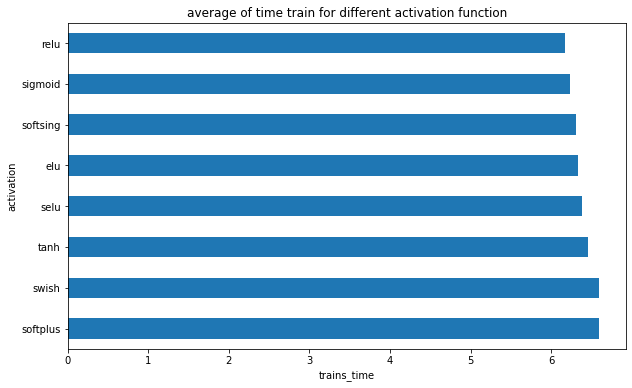

In [33]:
ax = df_mean.sort_values(by=['trains_time'],ascending=False).plot.barh(stacked=True,title = 'average of time train for different activation function', x='activation', y='trains_time',legend=False, figsize=(10, 6))
ax.set_ylabel("activation")
ax.set_xlabel("trains_time")

Jak widać, z wykresu wyżej relu ma srednio szybszy czas wykonania niż swish, dlatego może uznać, że funkcja aktywująca relu jest najlepsza funckją aktuwującą dla  naszego modelu. 